# **1. Import Library**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import confusion_matrix

# **2. Read Dataset**

In [2]:
iris = datasets.load_iris()

X = iris.data
y = iris.target

df = pd.DataFrame(data=X, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Memisahkan fitur dan target
X = df.drop('species', axis=1)
y = df['species']


In [3]:
# Melihat 5 baris pertama dari dataset
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# **3. Data Preparation & Data Cleaning**

In [4]:
df.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
species,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


# **4. Exploratory Data Analysis (EDA)**

In [6]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# **3. Split Data**

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **4. Train the Model**

In [8]:
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model KNN
model = RandomForestClassifier(random_state=42)

# Melatih model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# **5. Predict & Evaluate**

In [9]:
from sklearn.metrics import accuracy_score

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
accuracy = accuracy_score(y_test, y_pred)

print("Laporan Klasifikasi")
print(f'Akurasi: {accuracy * 100:.2f}%')

Laporan Klasifikasi
Akurasi: 100.00%


## Visualisasi Heatmap

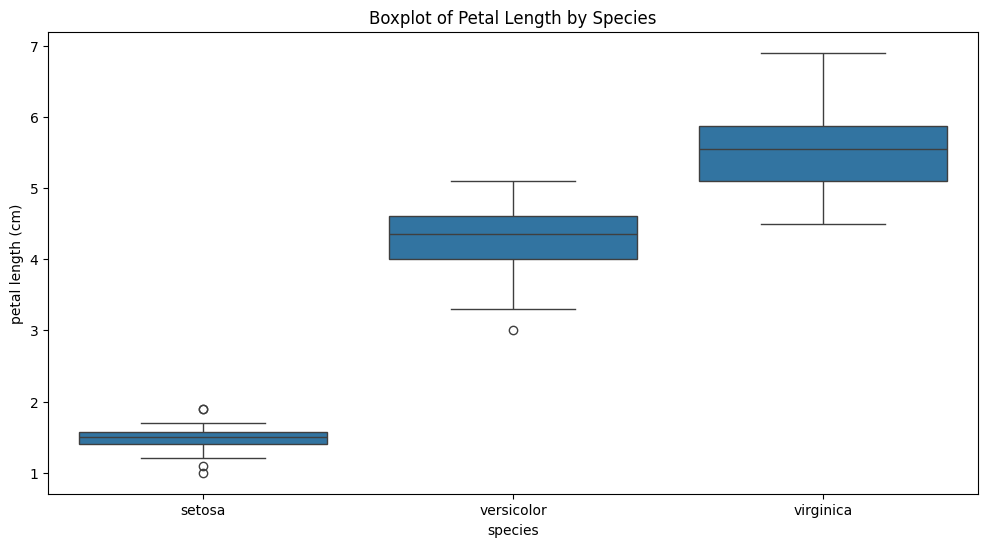

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='species', y='petal length (cm)', data=df)
plt.title('Boxplot of Petal Length by Species')
plt.show()

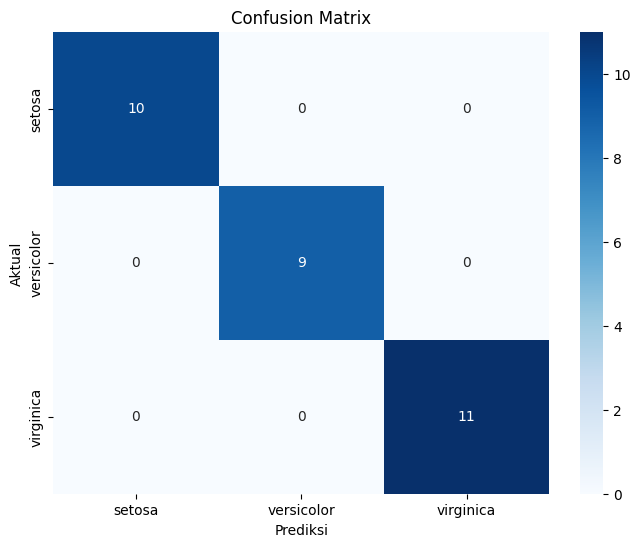

In [11]:
# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Membuat heatmap untuk confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()